In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from rdkit.Chem import MolFromPDBFile
from experiment_utils import interactive_alignment_plot_py3dmol
# %matplotlib widget

In [5]:
data_path = "../Data/first_8_molecules_RDKIT"
lig_list = ['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
for ligand in lig_list:
    result = []
    for i in range(50):
        path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
        path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
        molA = MolFromPDBFile(path1, removeHs=True, sanitize=False)
        molB = MolFromPDBFile(path2, removeHs=True, sanitize=False)
        X_A, T_A, B_A = otm.tl.process_rdkit_mol(molA, heavy_atoms_only=True)
        X_B, T_B, B_B = otm.tl.process_rdkit_mol(molB, heavy_atoms_only=True)
        optimal_assignment, rmsd_best, alpha_best, mismatched_bond_best = otm.tl.molecule_alignment(
            X_A, X_B, T_A, T_B, B_A, B_B, 
            alpha_list = np.linspace(0, 1, 201)[1:], 
            cst_D = 1,
            count_mismatched_bond = True)  
        print(ligand, i, rmsd_best, mismatched_bond_best)
        result.append({
            'nameA': ligand,
            'nameB': ligand+'_conf'+str(i),
            'RMSD(OTMol)': rmsd_best,
            'alpha': alpha_best,
            'mismatch_bond': mismatched_bond_best,
            'assignment': optimal_assignment,
        })
    pd.DataFrame(result).to_csv(('./otmol_output/{}_result.csv'.format(ligand)), index=False)

1ln1_DLP 0 4.956857268685251 0
1ln1_DLP 1 6.503685949725692 0
1ln1_DLP 2 5.551200695137789 1
1ln1_DLP 3 4.509755357300606 2
1ln1_DLP 4 4.425341378774354 1
1ln1_DLP 5 4.122663108359444 1
1ln1_DLP 6 4.73974477163613 1
1ln1_DLP 7 4.186053200045016 1
1ln1_DLP 8 4.538813968105411 0
1ln1_DLP 9 5.424869718186608 0
1ln1_DLP 10 6.096154588901272 0
1ln1_DLP 11 5.5574600610245275 0
1ln1_DLP 12 5.056865452738485 1
1ln1_DLP 13 4.737721249561265 1
1ln1_DLP 14 6.354480638468658 0
1ln1_DLP 15 4.3455852736335885 1
1ln1_DLP 16 4.588761890805901 1
1ln1_DLP 17 4.680965486365404 0
1ln1_DLP 18 5.629919631228522 1
1ln1_DLP 19 4.832911539227641 2
1ln1_DLP 20 6.418271732466377 1
1ln1_DLP 21 5.938823528683873 1
1ln1_DLP 22 5.613288207419579 1
1ln1_DLP 23 5.64728330219514 0
1ln1_DLP 24 4.9864470416995115 0
1ln1_DLP 25 4.832693993725014 0
1ln1_DLP 26 3.539573607975705 0
1ln1_DLP 27 4.794511908788518 0
1ln1_DLP 28 5.3598138362428696 1
1ln1_DLP 29 5.736881369286873 0
1ln1_DLP 30 3.89384290808997 0
1ln1_DLP 31 6.275

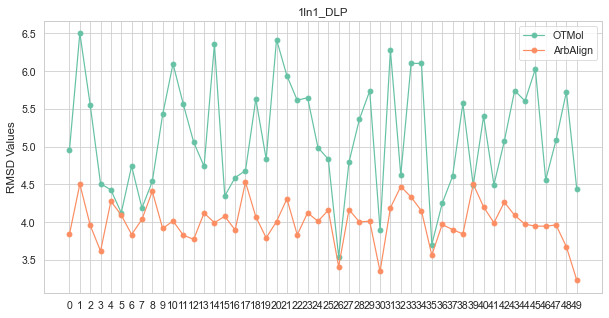

In [6]:
arbalign_res = pd.read_csv('./arbalign_output/1ln1_DLP_result.csv')
otmol_res = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'}), 
    otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    ], axis=1)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.plot(range(0,50), combined_df["OTMol"], marker='o', label="OTMol", clip_on=False, zorder=10)
plt.plot(range(0,50), combined_df["ArbAlign"], marker='o', label="ArbAlign", clip_on=False, zorder=10)
plt.title("1ln1_DLP")
plt.xlabel("")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.xticks(range(0,50))
#plt.xlim(2,20)
plt.legend()
plt.grid(True)
#plt.savefig('../images/S1MAW1_element_name.png', dpi=300, bbox_inches='tight')

In [15]:
df = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '1ln1_DLP'
i = 0
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
molA = MolFromPDBFile(path1, removeHs=True, sanitize=False)
molB = MolFromPDBFile(path2, removeHs=True, sanitize=False)
X_A, T_A, B_A = otm.tl.process_rdkit_mol(molA)
X_B, T_B, B_B = otm.tl.process_rdkit_mol(molB, heavy_atoms_only=True)
assignment = [int(x) for x in df['assignment'][i].strip('[]').split()]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '1ln1_DLP'
i = 0
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.xyz')
path2 = os.path.join('arbalign_output', ligand+'_conf'+str(i)+'-aligned_to-'+ligand+'.xyz')
molA = next(pybel.readfile("xyz", path1))
molB = next(pybel.readfile("xyz", path2))
X_A, T_A, B_A = otm.tl.process_molecule(molA, heavy_atoms_only=True) 
X_B, T_B, B_B = otm.tl.process_molecule(molB, heavy_atoms_only=True)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int), '', '')

3.8400934103533766


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [29]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-3.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][1]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [30]:
# %%
# Read the molecules
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-20.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
assignment = otmol_name_res['assignment'][18]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, R, _ = otm.tl.kabsch(X_A, X_B, P) 
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

ArbAlign alignment

In [11]:
data_path = "../Data/S1-MA-W1"
molA = next(pybel.readfile("xyz", os.path.join(data_path, 's1maw1-1.xyz')))
molB = next(pybel.readfile("xyz", './arbalign_output/s1maw1-2-aligned_to-s1maw1-1.xyz'))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
interactive_alignment_plot_py3dmol(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int))

1.0991218764992043


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
data_path = "../Data/S1-MA-W1"
molA = next(pybel.readfile("xyz", os.path.join(data_path, 's1maw1-1.xyz')))
molB = next(pybel.readfile("xyz", './arbalign_output/s1maw1-2-aligned_to-s1maw1-1.xyz'))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, np.arange(X_A.shape[0], dtype=int), save=True)

1.0991218764992043
